# About The Dataset.
The Global Cybersecurity Threats Dataset (2015-2024) provides extensive data on cyberattacks, malware types, targeted industries, and affected countries. It is designed for threat intelligence analysis, cybersecurity trend forecasting, and machine learning model development to enhance global digital security.

![cyber](https://www.produktion.de/assets/images/b/cyberattacke-zenzen-stock-adobe-com-bearbeitet-95f6fc87.jpg)

# Importing The Libraries 📚📚.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

# Lode The Dataset 

In [2]:
df = pd.read_csv("/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv")

In [3]:
df.head().style.background_gradient(cmap = "PuBu")

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.530000,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.190000,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.650000,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.440000,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.410000,810682,Insider,Social Engineering,VPN,68


# Understand the Dataset 🔍¶
Check basic details.
 

Check for missing values.

In [4]:
from colorama import Fore, Style

# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "train_df shape: " + Style.RESET_ALL)
print(f"{df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "train_df info: " + Style.RESET_ALL)
print(f"{df.info()}\n") 

# Print the count of missing (NaN) values in each column
print(Fore.YELLOW + "train_df isnull sum: " + Style.RESET_ALL)
print(f"{df.isnull().sum()}\n")

# Print summary statistics for numerical columns (count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "train_df describe: " + Style.RESET_ALL)
print(f"{df.describe()}\n")

train_df shape: 
(3000, 10)

train_df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23

# EDA 📉📊📈

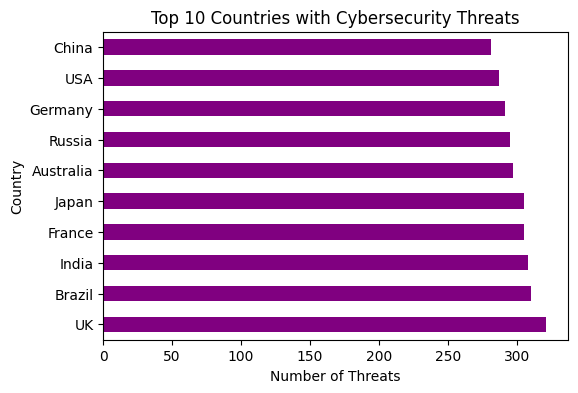

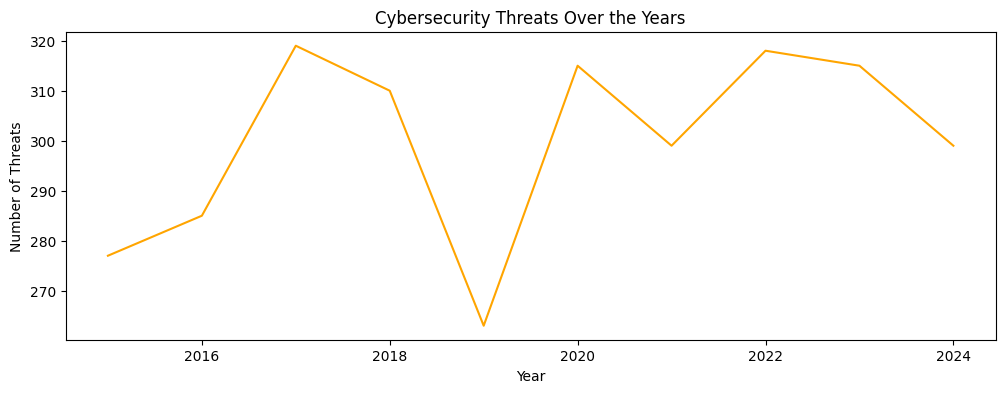

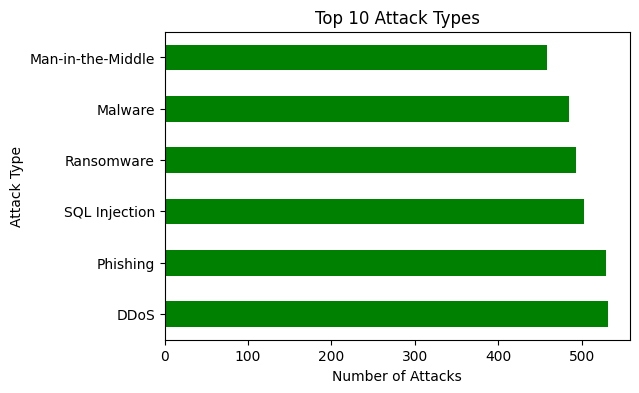

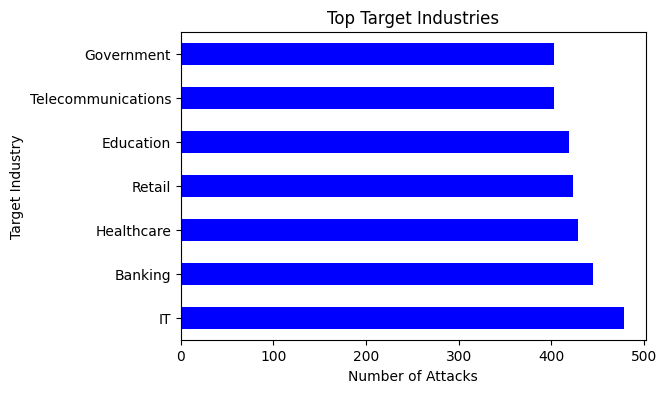

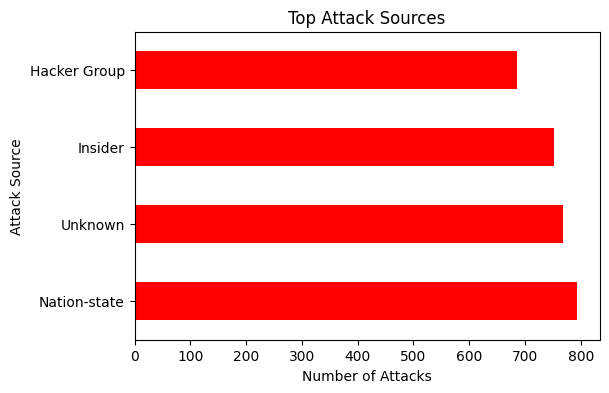

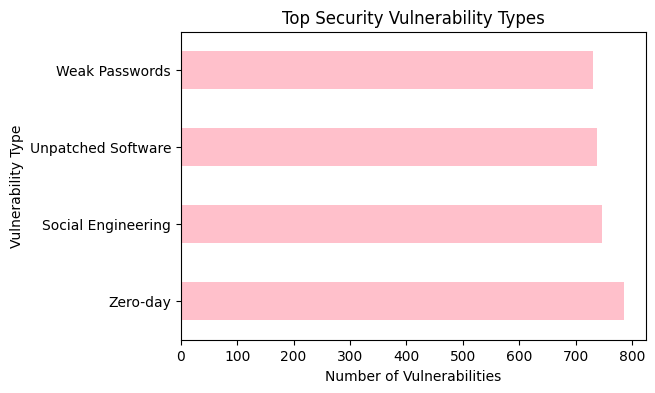

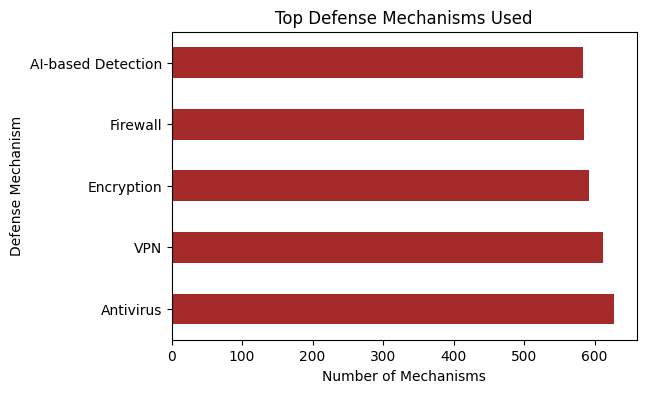

In [5]:
# Count the number of unique values in each column
# First count of unique in  country values
df["Country"].value_counts().head(10).plot(kind = "barh", figsize = (6, 4), color = "purple")
plt.title("Top 10 Countries with Cybersecurity Threats")
plt.xlabel("Number of Threats")
plt.ylabel("Country")
plt.show()

# Count  of Years
df["Year"].value_counts().sort_index().plot(kind="line", figsize=(12, 4), color="orange")
plt.title("Cybersecurity Threats Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Threats")
plt.show()

# Count of unique values in  attack types
df["Attack Type"].value_counts().plot(kind = "barh", figsize = (6, 4), color = "green")
plt.title("Top 10 Attack Types")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Type")
plt.show()

# Count of unique values in  attack types
df["Target Industry"].value_counts().head(10).plot(kind = "barh", figsize = (6, 4), color = "blue")
plt.title("Top Target Industries")
plt.xlabel("Number of Attacks")
plt.ylabel("Target Industry")
plt.show()

# Count of unique values in  attack types
df["Attack Source"].value_counts().plot(kind = "barh", figsize = (6, 4), color = "red")
plt.title("Top Attack Sources")
plt.xlabel("Number of Attacks")
plt.ylabel("Attack Source")
plt.show()

# Count of unique values in  Security Vulnerability Type
df["Security Vulnerability Type"].value_counts().head(10).plot(kind = "barh", figsize = (6, 4), color = "pink")
plt.title("Top Security Vulnerability Types")
plt.xlabel("Number of Vulnerabilities")
plt.ylabel("Vulnerability Type")
plt.show()

# Count of unique values in Defense Mechanism Used
df["Defense Mechanism Used"].value_counts().head(10).plot(kind = "barh", figsize = (6, 4), color = "brown")
plt.title("Top Defense Mechanisms Used")
plt.xlabel("Number of Mechanisms")
plt.ylabel("Defense Mechanism")
plt.show()

# Some Summary 🔍.

## 1. Top Country:
> 2. UK
> 3. Brazil
 4. India
 5. France
 6. Japan
 7. Australia
 8. Russia
 9. Germany
 10. USA
 11. China

## 2. Cybersecurity Threats Over the Year:
> 2017 , 2020 , 2022 , 2024

## 3.Top Cybersecurity Attack Types:
### 1. DDoS:
          > DDoS (Distributed Denial of Service) is a cyber attack.
            It overwhelms a system with traffic from multiple sources.
            Attackers use botnets to flood the target with traffic.
            This causes resource exhaustion, making the system unavailable.
            DDoS attacks can lead to downtime, financial losses, and data breaches.
### 2. Phishing:
          > Phishing is a cybercrime where attackers, posing as legitimate entities, use fraudulent emails, text messages, or phone calls             to trick individuals into revealing sensitive information like passwords, financial details, or personal data.
### 3. SQL Injection:
          > Structured Query Language (SQL) injection is an attack technique that attempts to subvert the relationship between a webpage              and its supporting database, typically in order to trick the database into executing malicious code.
### 4. Ransomware:
         > Ransomware is malware that encrypts files or locks devices.
           Attackers demand a ransom for decryption or unlock codes.
           Types include crypto-ransomware, locker ransomware, and doxware.
           Consequences include data loss, financial loss, and reputational damage.
           Prevention involves backups, software updates, antivirus software, and employee education.
### 5. Malware:
        > Malware is malicious software that harms or exploits devices.
          Types include viruses, worms, trojans, ransomware, and spyware.
          Malware attacks can steal data, disrupt systems, or demand ransom.
          Attacks often occur through phishing, downloads, or vulnerabilities.
          Prevention involves antivirus software, updates, and safe computing practices.
### 6. Man-in-the-Middle:
       >  man-in-the-middle (MITM) attack is a cyberattack where an attacker intercepts and potentially alters communication between two            parties, pretending to be one of them to steal sensitive information or disrupt the conversation. 



## 4. Top Target Industries in Cybersecurity: 
> 1, IT
> 
> 2, Banking
>
> 3, Healthcare
>
> 4, Retail
>
> 5 Education
>
> 6 Telecommunications
>
> 7, Government

## 5. Top Attack Sources:
> Nation-state    
> Unknown         
> Insider         
> Hacker Group

## 6. Top Security Vulnerability Types:
> Zero-day             
> Social Engineering   
> Unpatched Software    
> Weak Passwords       

## 7. Top Defense Mechanisms Used:
> Antivirus            
> VPN                  
> Encryption            
> Firewall              
> AI-based Detection   
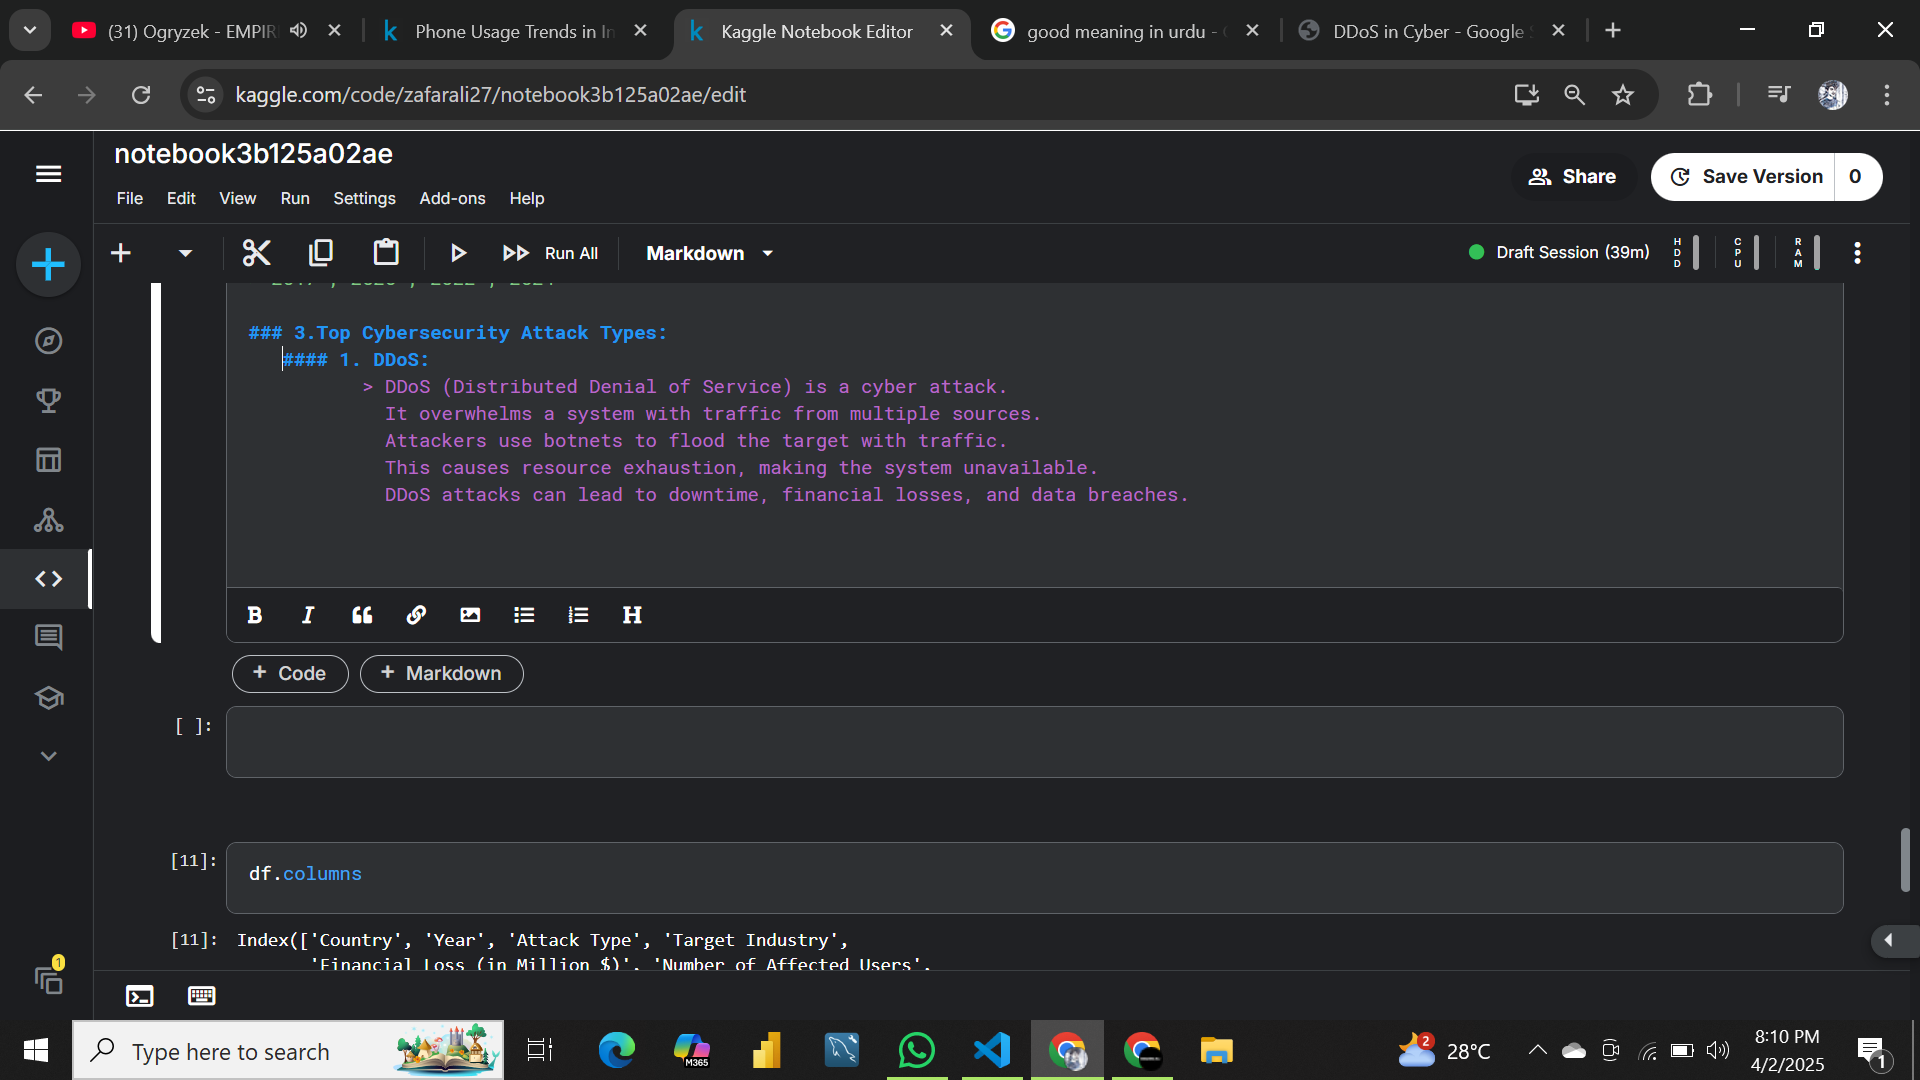

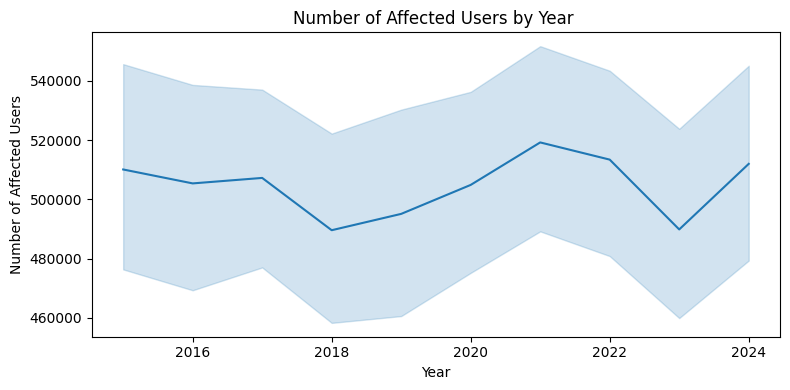

In [6]:
plt.figure(figsize=(8,4))
sns.lineplot(x = "Year", y = "Number of Affected Users", data = df, palette="viridis")
plt.title("Number of Affected Users by Year ")
plt.xlabel("Year")
plt.ylabel("Number of Affected Users")
plt.tight_layout()
plt.show()

## Most Affected Years
> 2016
> 2017
> 2019
> 2020
> 2021
> 2022
> 2024

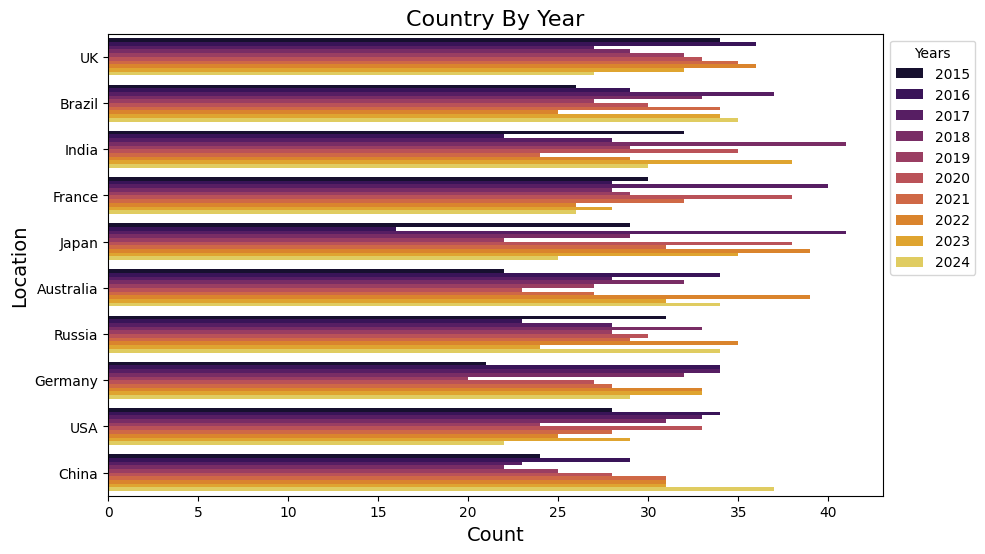

In [7]:
# Countries Attack by Year
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, hue="Year", palette="inferno")
plt.title("Country By Year", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.legend(title="Years", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

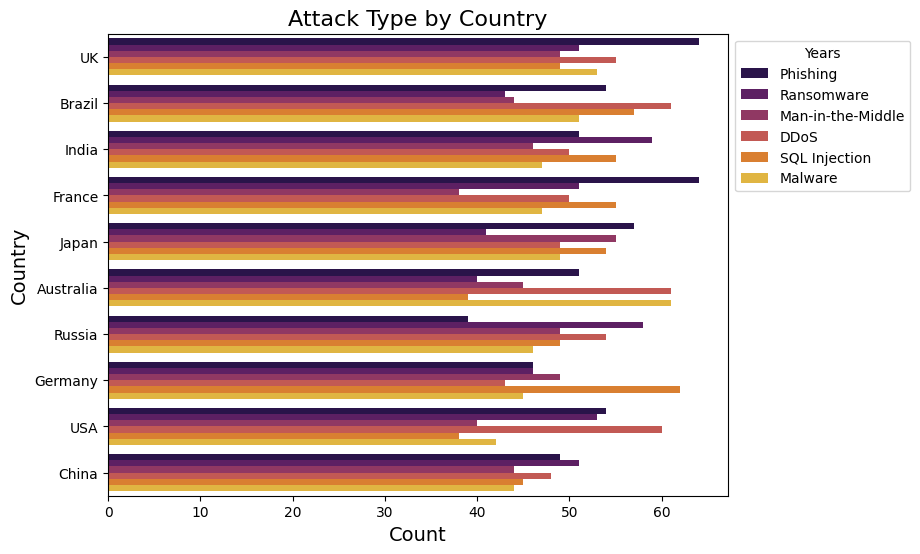

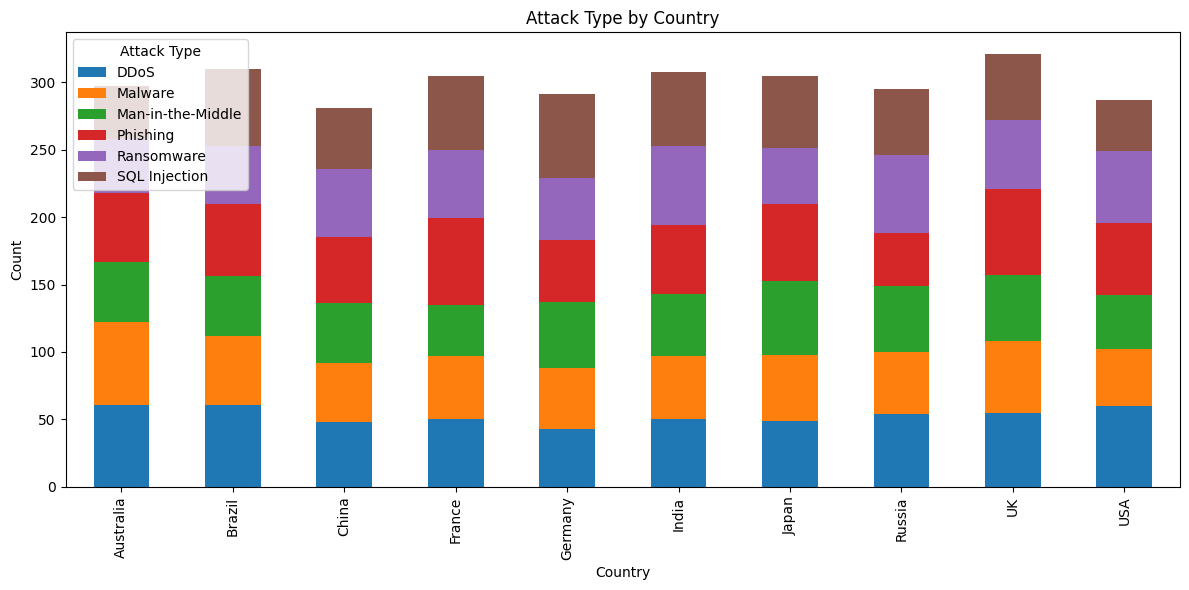

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index, hue="Attack Type", palette="inferno")
plt.title("Attack Type by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Years", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


df.groupby('Country')["Attack Type"].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Attack Type by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

>  The most common attack type in the UK is phishing.
>
> 
>  The most common attack type in Brazil is DDoS.
>
> 
> The most common attack type in India is Ransomware.
>
> The most common attack type in France is phishing.
>
> The most common attack type in Japan is phishing.
>
> In Australia, the two most common forms of attack, DDoS,
Malware.
>
> The most common attack type in Russia is Ransomware.
>
> The most common attack type in Germany is SQL Injection.
>
>In USA, the two most common forms of attack, DDoS,
phishing.
>
> In China, the two most common forms of attack, phishing,Ransomware.

# It is the most common attack in our country: Phishing, DDoS 💣.



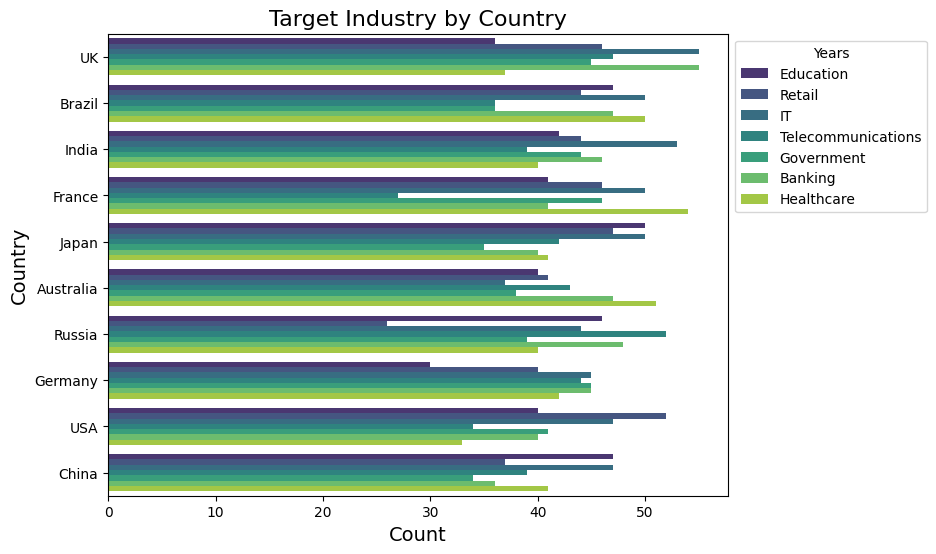

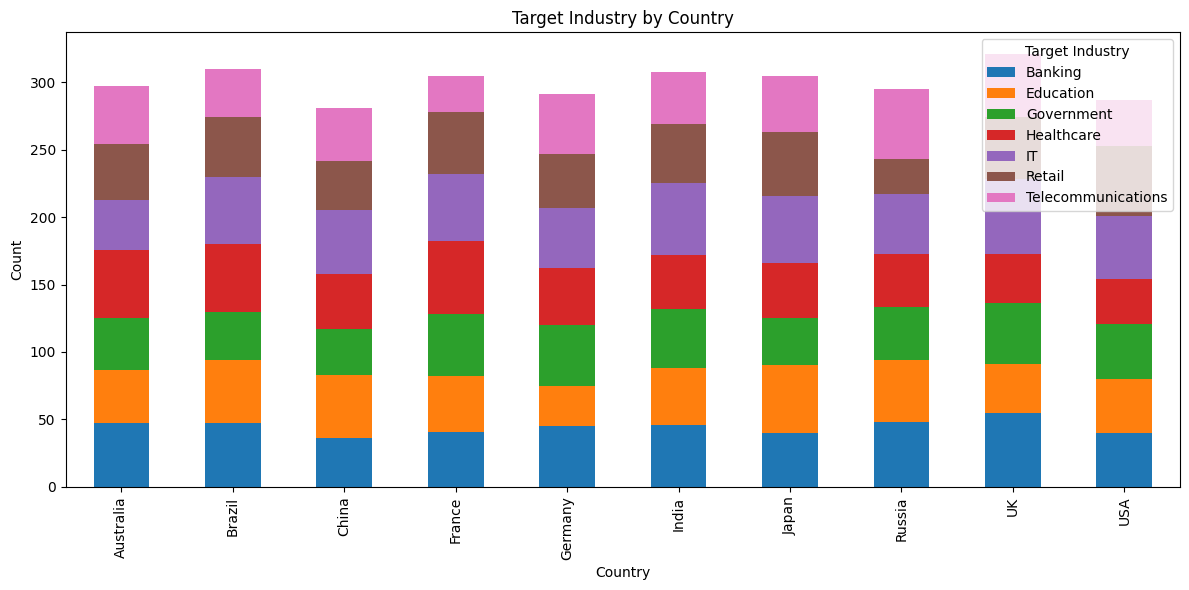

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df , y = "Country", order=df["Country"].value_counts().index, hue = "Target Industry",palette="viridis")
plt.title("Target Industry by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Years", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby("Country")["Target Industry"].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Target Industry by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Target Industry')
plt.tight_layout()
plt.show()

> In the UK,Hacker most target industries Education and Retail.
>
> In Brazil, Hacker most target industries is IT and Healthcare.
>
> In India, Hacker most target industries is  IT.
>
> In France, Hacker most target industries is  Healthcare.
>
> In Japan, Hacker most target industries is  IT and Education.
>
> In Australia, the Hacker most target industries is Healthcare.
>
> In Russia, the Hacker most target industries is  Telecommunications.
>
> In Germany, the Hacker most target industries is . IT, Government, Banking.
>
> In the USA, the Hacker most target industries is Retail.
>
> In China, the Hacker most target industries is IT and  Education.

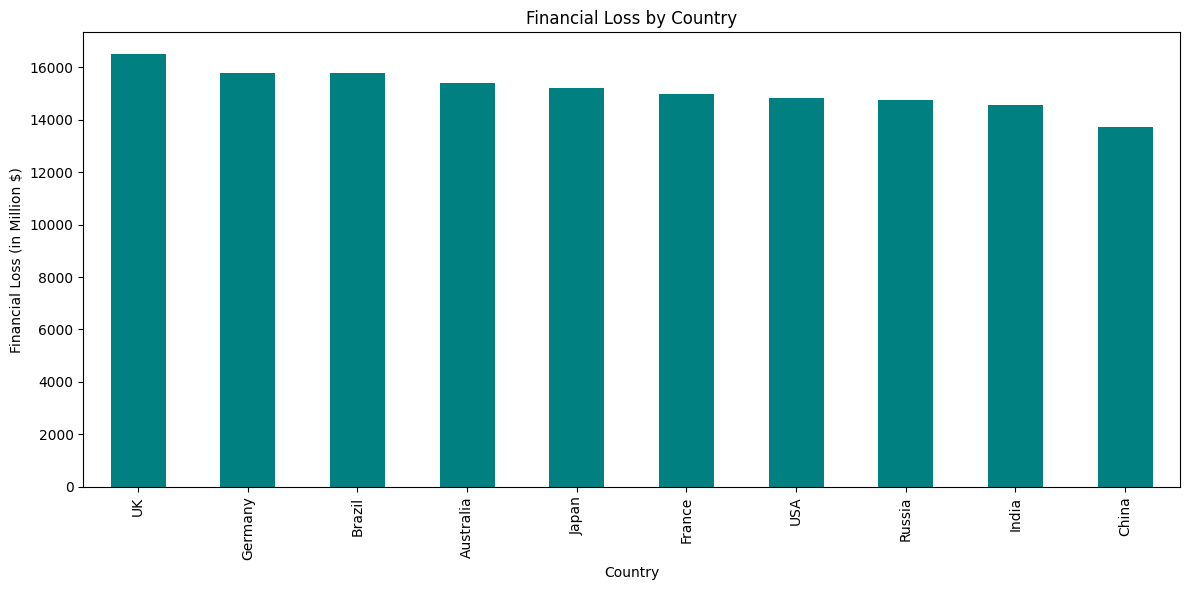

In [10]:
df.groupby("Country")["Financial Loss (in Million $)"].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Financial Loss by Country')
plt.xlabel('Country')
plt.ylabel('Financial Loss (in Million $)')
plt.tight_layout()
plt.show()

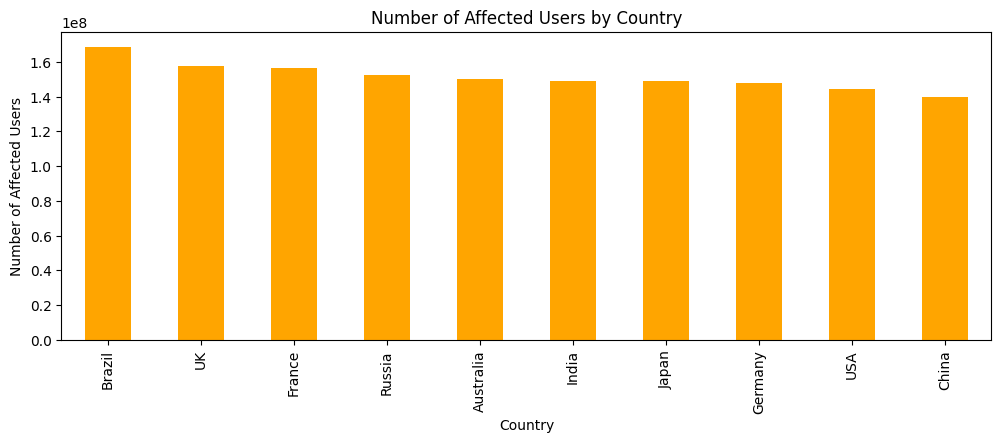

In [11]:
df.groupby("Country")["Number of Affected Users"].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), color='orange')
plt.title('Number of Affected Users by Country')
plt.xlabel("Country")
plt.ylabel("Number of Affected Users")
plt.show()

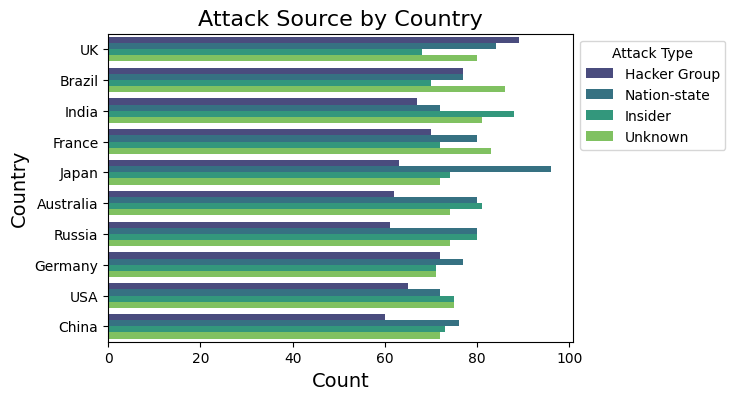

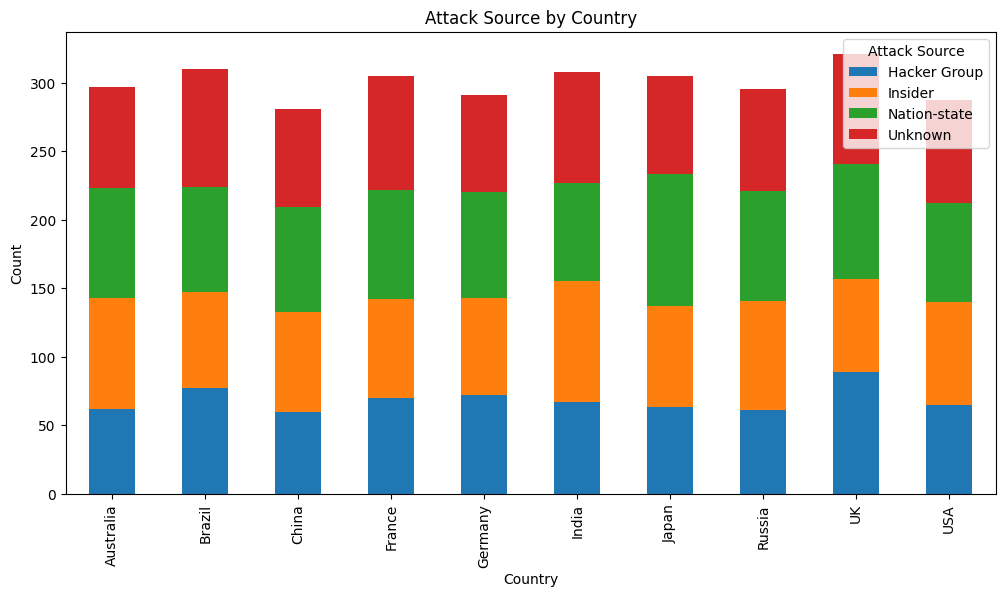

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data = df, y = "Country", order = df["Country"].value_counts().index, hue = "Attack Source",palette="viridis")
plt.title("Attack Source by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()




df.groupby("Country")["Attack Source"].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Attack Source by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

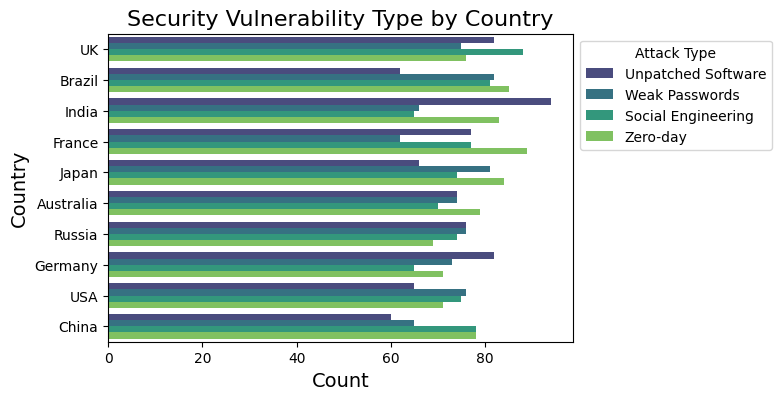

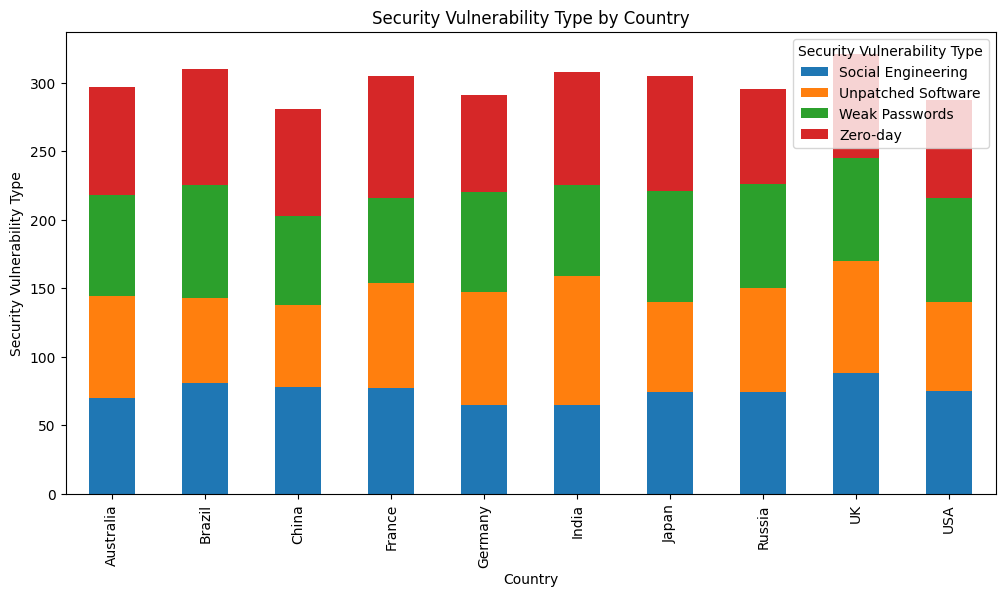

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data = df, y = "Country", order = df["Country"].value_counts().index, hue = "Security Vulnerability Type",palette="viridis")
plt.title("Security Vulnerability Type by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby("Country")["Security Vulnerability Type"].value_counts().unstack().plot(kind = "bar",stacked=True, figsize=(12, 6) )
plt.title("Security Vulnerability Type by Country")
plt.xlabel("Country")
plt.ylabel("Security Vulnerability Type")
plt.show()

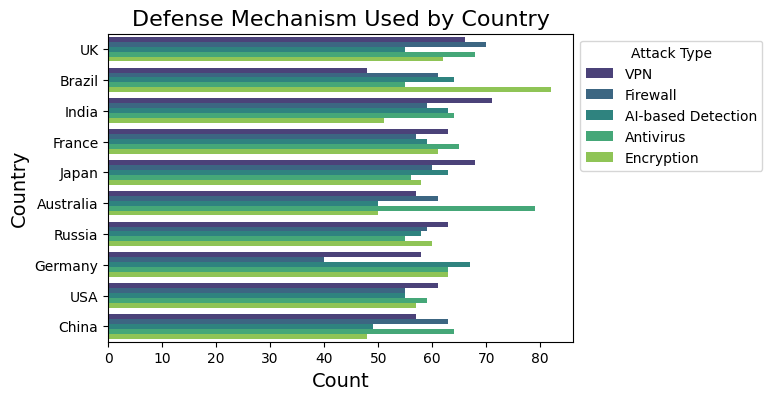

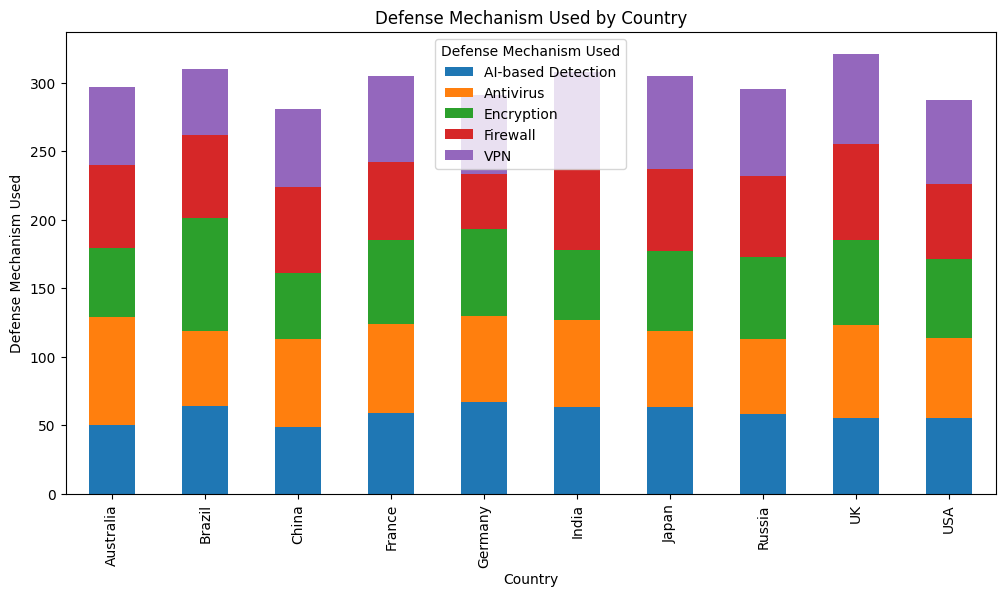

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data = df, y = "Country", order = df["Country"].value_counts().index, hue = "Defense Mechanism Used",palette="viridis")
plt.title("Defense Mechanism Used by Country", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(title="Attack Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

df.groupby("Country")["Defense Mechanism Used"].value_counts().unstack().plot(kind="bar",stacked=True, figsize=(12, 6))
plt.title("Defense Mechanism Used by Country")
plt.xlabel("Country")
plt.ylabel("Defense Mechanism Used")
plt.show()

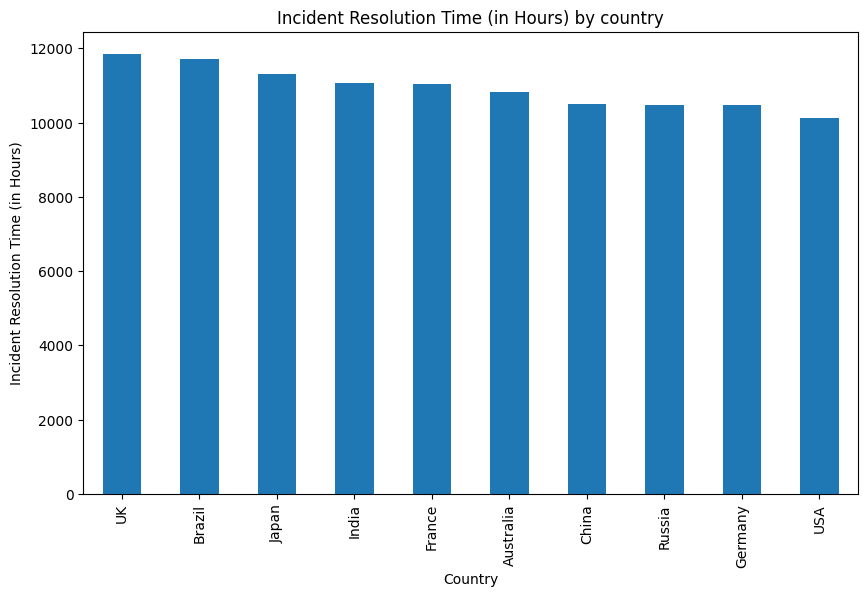

In [15]:
df.groupby('Country')["Incident Resolution Time (in Hours)"].sum().sort_values(ascending=False).plot(kind = "bar",stacked=True, figsize=(10, 6))
plt.title("Incident Resolution Time (in Hours) by country")
plt.xlabel("Country")
plt.ylabel("Incident Resolution Time (in Hours)")
plt.show()

# LabelEncoder 0,1

In [16]:
cat = df.select_dtypes(include=["object"])
label = LabelEncoder()

for column in cat.columns:
	df[column] = label.fit_transform(df[column])

# Split Features Target

In [17]:
x = df.drop(columns = ["Attack Type"])
y = df["Attack Type"]

In [18]:
stander = StandardScaler()
x = pd.DataFrame(stander.fit_transform (x), columns = x.columns)

# Train-Test Split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [20]:
print(f"x_train shape",x_train.shape)
print(f"x_test shape",x_test.shape)
print(f"y_train shape",y_train.shape)
print(f"y_test shape",x_test.shape)

x_train shape (2400, 9)
x_test shape (600, 9)
y_train shape (2400,)
y_test shape (600, 9)


## Frist Model is DecisionTree 🤖🌳🌲.

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=13,max_features = 8,min_samples_leaf = 50)

# Fit the model 
dt.fit(x_train,y_train)

# Evaluate the model
y_pred = dt.predict(x_test)

print("RMEN",np.sqrt(mean_squared_error(y_test,y_pred)))

RMEN 2.3639655947862974


In [22]:
from sklearn.linear_model import Ridge

rig = Ridge(alpha=4.0, fit_intercept=True, max_iter=None, solver='auto', random_state=None)

# Fit the model
rig.fit(x_train, y_train)

# Evaluate the model
accuracy = rig.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: -0.002158246990143553


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

y_pred = rand_search.predict(x_test)
print("RMEN",np.sqrt(mean_squared_error(y_test,y_pred)))

RMEN 2.3079572497485015


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Define your hyperparameter grid
param_grid = {
    'n_estimators': n_estimators,  # e.g., [100, 200, 300]
    'max_features': max_features,  # e.g., ['auto', 'sqrt']
    'max_depth': max_depth,        # e.g., [10, 20, 30, None]
    'max_samples': max_samples,    # e.g., [0.5, 0.75, 1.0]
    'bootstrap': bootstrap,        # e.g., [True, False]
    'min_samples_split': min_samples_split,  # e.g., [2, 5, 10]
    'min_samples_leaf': min_samples_leaf     # e.g., [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,           
    cv=5,                 
    verbose=2,
    random_state=42,
    n_jobs=-1             
)

# Fit to training data
random_search.fit(x_train, y_train)


print("Best Estimator:", random_search.best_estimator_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Estimator: RandomForestClassifier(max_depth=2, max_features=0.6, max_samples=1.0,
                       min_samples_split=5)


In [25]:
print(random_search.best_score_)

0.19291666666666668


In [26]:
# from sklearn.model_selection import GridSearchCV
# d_tree = DecisionTreeClassifier()
# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7, 10,2,15,20],
#     'max_features': [0.2, 0.5, 0.8],
#     'min_samples_split': [2, 5, 10,8,9,],
#     'max_leaf_nodes':[6,2,5,10,13,7,1,20],
#     'min_samples_leaf':[1.4,2,6,8,9,10,15]
# }

# # Initialize the GridSearchCV with the DecisionTreeRegressor
# d_tree_grid = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, verbose=2)

# # Fit the model
# d_tree_grid.fit(x_train, y_train)

# Zafar Ali created this notebook
# Follow me more.